# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import shutil
import os

# Reading Data

In [ ]:
train_data = pd.read_csv("Data/train.csv", index_col = False)

In [ ]:
# Reading the whole data using networkx
train_graph = nx.read_edgelist("Data/train.csv", delimiter = ',', nodetype = int, comments = 's', create_using = nx.DiGraph())

### Following of Each User

Now, After we have finished analysing each user **followers** aka incoming edges or the indegree of each node in (graph language) we shall now start analysing the nodes that user follow or the outdegree of each node, and i will apply the same method we have done in the first part.

In [ ]:
outdegree_dist = list(dict(train_graph.out_degree()).values())
outdegree_dist.sort()

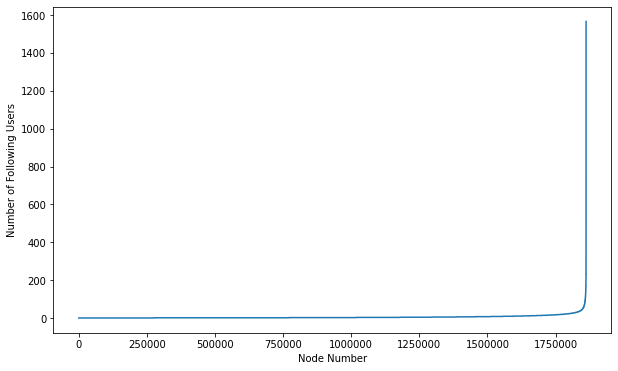

In [ ]:
plt.figure(figsize = (10, 6))
# Put integer values on x-axis rather than float
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.plot(outdegree_dist)
plt.xlabel("Node Number")
plt.ylabel("Number of Following Users")
plt.show()

The shape of this plot is excactly as the previous one, a very few number of users with a lot of following and the rest of users gather togeather in the left and that expectable because most of users follow only the people they know and some celebrites sometimes.

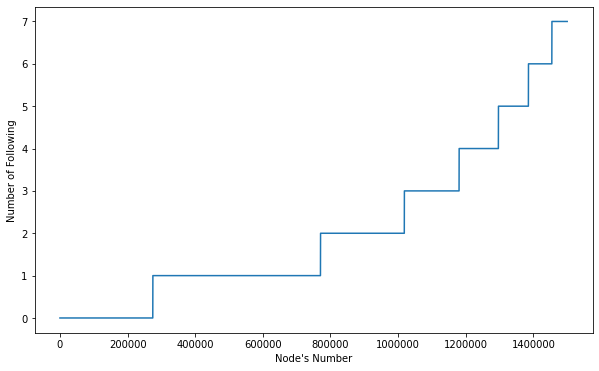

In [ ]:
plt.figure(figsize = (10, 6))
# Taking the first 1,500,000 and focusing on it
plt.plot(outdegree_dist[:1500000])
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.xlabel("Node's Number")
plt.ylabel("Number of Following")
plt.show()

Obviously the change in number of following people is not large as well, so we have a large number of nodes that have relatively small diffrence in term of number of following, We can say that majority of nodes tend to group togeather in term of number of following also and only few number of them have a large following number (Really active people in term of follow other people).

In [ ]:
print("Min number of following for a node =", np.min(outdegree_dist))
print("Max number of following for a node =", np.max(outdegree_dist))

Min number of following for a node = 0
Max number of following for a node = 1566


In [ ]:
cnt = 0
for i in outdegree_dist:
  if i == 0:
    cnt += 1

print("Number of nodes with no following ==> Zero followers =", cnt)

Number of nodes with no following ==> Zero followers = 274512


In [ ]:
cnt = 0
mx = np.max(outdegree_dist)
for i in outdegree_dist:
  if i == mx:
    cnt += 1

print("Number of nodes with max following ==> Max number of followers =", cnt)

Number of nodes with max following ==> Max number of followers = 1


We have a lot of nodes (Users) about 274512K whos follow no other users at all but we have only one user with max number of following which is 1566 and this value is really high in compare with the distribution, Now we shall calculate Mean, Median and Percentaile of outdegree distribuiton to get more insight of how this values spread.

In [ ]:
print("The average of out degree distribution =", np.mean(outdegree_dist))
print("The median of out degree distribution =", np.median(outdegree_dist))

The average of out degree distribution = 5.067886178861789
The median of out degree distribution = 2.0


Thoses value are pretty close the the value in indegree distribution, Say that mean is skewed to right due to some nodes with large number of following but median was not affected by those extreme values, We can see the slow change in values closeley better using percentiles values.

In [ ]:
for i in range(0, 110, 10):
  print(f"The {i}th percentile value of outdegree distribution =", np.percentile(outdegree_dist, i))

The 0th percentile value of outdegree distribution = 0.0
The 10th percentile value of outdegree distribution = 0.0
The 20th percentile value of outdegree distribution = 1.0
The 30th percentile value of outdegree distribution = 1.0
The 40th percentile value of outdegree distribution = 1.0
The 50th percentile value of outdegree distribution = 2.0
The 60th percentile value of outdegree distribution = 3.0
The 70th percentile value of outdegree distribution = 5.0
The 80th percentile value of outdegree distribution = 7.0
The 90th percentile value of outdegree distribution = 12.0
The 100th percentile value of outdegree distribution = 1566.0


40% of the users follow on one user, 50% of them follow only 2 users or less, Most of the values tend to follow small number of users, which give us some thought of users in this graph tend not to follow others people easily and hence making new links may not be very probabe and For that if we focus on the right part of the followers starting from 90th and larger to get more insight how the number of followers of those values growth.

In [ ]:
for i in range(90, 101, 1):
  print(f"The {i}th percentile =", np.percentile(outdegree_dist, i))

The 90th percentile = 12.0
The 91th percentile = 13.0
The 92th percentile = 14.0
The 93th percentile = 15.0
The 94th percentile = 17.0
The 95th percentile = 19.0
The 96th percentile = 21.0
The 97th percentile = 24.0
The 98th percentile = 29.0
The 99th percentile = 40.0
The 100th percentile = 1566.0


In [ ]:
for i in range(0, 110, 10):
  j = 99 + (i / 100)
  print(f"The {j}th percentile =", np.percentile(outdegree_dist, j))

The 99.0th percentile = 40.0
The 99.1th percentile = 42.0
The 99.2th percentile = 45.0
The 99.3th percentile = 48.0
The 99.4th percentile = 52.0
The 99.5th percentile = 56.0
The 99.6th percentile = 63.0
The 99.7th percentile = 73.0
The 99.8th percentile = 90.0
The 99.9th percentile = 123.0
The 100.0th percentile = 1566.0


The growth in the number of followers at the last 10th percentile happened faster than lower part of the range but slower than the indegree distribution, The chage is about 2 increse in number of followed users for each approximatiely 188K users, For the last 99 to 100 th the only really extrem value is the 100th percentile which has 1566 value which is really huge in compare to other users, this value has high probability to be classified as an outlier.

In [ ]:
Q1, Q3 = np.percentile(outdegree_dist, 25), np.percentile(outdegree_dist, 75)
IQR = Q3 - Q1
print("Inter Quantile Range =", IQR)

Inter Quantile Range = 5.0


In [ ]:
low_limit, high_limit = -1.5 * Q1, +1.5 * Q3
print("The low limit of the data to be consider as outliers =", low_limit)
print("The high limit of the data to be consider as outliers =", high_limit)

The low limit of the data to be consider as outliers = -1.5
The high limit of the data to be consider as outliers = 9.0


So each value below our low limit would be considered as outlier but here this is not possible due to the fact that the low limit is negative hence no user has negative number of followers and that's obvious because the data is clearley skewed to the right, and each value grater than our high limit in this case 9 would be considered as outliers.

In [ ]:
cnt = 0
for i in outdegree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 266158
Percentage of values over the upper limit = 14.29251108891538 %


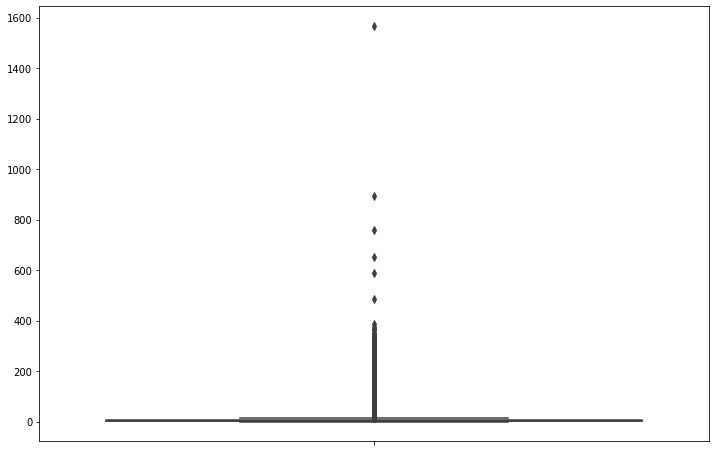

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = outdegree_dist)
plt.show()

In [ ]:
# increasing the threshold from 1.5 to 3
# I will discard low limit as it will be negative anyway
high_limit = +3 * Q3
print("The high limit of the data to be consider as outliers =", high_limit)

The high limit of the data to be consider as outliers = 18.0


In [ ]:
cnt = 0
for i in outdegree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 94345
Percentage of values over the upper limit = 5.066264995542954 %


This is more resonable and acceptable results as only 5% of the data could be outliers (not neccessary) rather than having 14% as outliers which is really large percentage.

<Figure size 864x576 with 0 Axes>

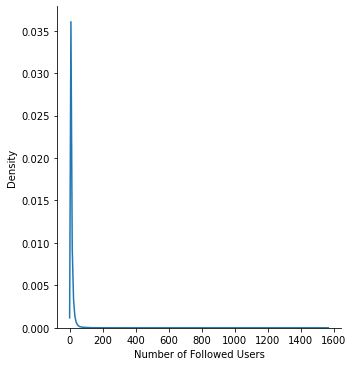

In [ ]:
plt.figure(figsize = (12, 8))
sns.displot(data = outdegree_dist, kind = "kde")
plt.xlabel("Number of Followed Users")
plt.show()

This distribuiton look more peaker in comparison to indegree distribuiton,and this average of outdegree is less that average of indegree, Still majority of values centered in the left side of the plot and only few number of values tend to have a large response, those values may be outliers espically the 100th percentile value.